<a href="https://colab.research.google.com/github/RavivKerner/test/blob/loss/Copy_of_FR6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 720 kB 22.7 MB/s 
     |████████████████████████████████| 1.2 MB 51.3 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 189 kB 52.6 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 51 kB 339 kB/s 
Mounted at /content/gdrive


Key Loss func & matrics by fastai 

Regression : 
MSE for loss and matric (TO DO: add all function)

#Classification Models:

##Binary classification models:

### Loss and accuracy build by me:

In [2]:
def Binary_cls_loss(preds,y):
  preds = sigmoid(preds)
  return torch.where(y==1, y-preds, preds).mean()

def Binary_metric_accuracy(preds, y, threshhold=0.5):
  pred_accuracy = (sigmoid(preds)>threshhold)
  return (pred_accuracy==y).float().mean()


### Loss and accuracy build in fastai chpter 4 (same as mine):

In [3]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

### Comparing both solutions:

Creater small test set for binary classification:

In [4]:
preds = tensor([ 9.4077, -1.3319,  9.3460,  5.9358])
y = tensor([1, 1, 0, 0])

loss functions test:

In [5]:
Binary_cls_loss(preds, y)==mnist_loss(preds, y)

tensor(True)

Accuracy functions test:

In [6]:
Binary_metric_accuracy(preds, y) == batch_accuracy(preds, y)

tensor(True)

There are no use of standart function during this chapter for simplification, later on chapter 6 has all the standrt functions names, for this case we shuold use nn.BCEWithLogitsLoss as its for Binary classifcations and includes sigmoid: 

In [7]:
binary_loss_func = nn.BCEWithLogitsLoss()

In [9]:
binary_loss_func(preds, y.float()) == Binary_cls_loss(preds, y) #added .float() to convert for the correct type 

tensor(False)

The values are not the same as the standart function includes negtive log on the results as it improves the optimization process, we will add negative log for verification:

In [10]:
def Binary_cls_loss_log(preds,y):
  preds = sigmoid(preds)
  return -np.log(1-torch.where(y==1, y-preds, preds)).mean()

In [12]:
binary_loss_func(preds, y.float()), Binary_cls_loss_log(preds, y)

(tensor(4.2127), tensor(4.2128))

Further research : In the last example, in the chapter F.cross_entropy wheconstruction the cnn_learner, it will be intresting to learn why and whats the difference from the standard Binary function 

## Multiclass classification

### Loss and accuracy build by me:

In [6]:
def softmaxp1(preds):
  sume = np.exp(preds).sum(1)
  return np.exp(preds)/sume.reshape((len(preds),1))

def multi_c_loss(preds, y):
  soft = softmaxp1(preds)
  softcon = np.log(soft)*-1
  idx = range(len(y))
  return softcon[idx, y].mean() #choosing for row 'idx' the value in column 'y' 

def multi_accuracy(preds, y):
  to_C = preds.argmax(1)
  return (to_C==y).float().mean()


### Loss and accuracy build in fastai chapter 5 (same as mine):

In class they build only the softmax and relay on the standrt functions for rest of the develpoment/explenation"

In [4]:
def softmax(x): return np.exp(x) / np.exp(x).sum(dim=1, keepdim=True)

*The loss function used for this classifier is `F.cross_entropy` which is 
actually softmax + negative log likelihood, this function is using `F.nll_loss` which calcuting the negative log likelihood but because Pytorch calculate log and sofmax in the same time, do not apply the log.
*Another importnat point is that by default all loss function in Pytorch takes the mean, we can define `reduction = None` to show the numbers before the mean.   

### Comparing both solutions:

In [2]:
y = tensor([0, 1, 1, 2, 3])
preds =tensor([[15.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 10.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

In [7]:
softmax(preds)==softmaxp1(preds)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [27]:
loss_func_nn = nn.CrossEntropyLoss(reduction='none')
F.cross_entropy(preds, y), multi_c_loss(preds, y), loss_func_nn(preds, y)

(tensor(2.6297),
 tensor(2.6297),
 tensor([3.2362e-03, 1.2105e-01, 8.7546e+00, 1.5746e+00, 2.6952e+00]))

Standart `error_rate` was used in this chapter so אo compare, we subtract from 1: 

In [30]:
(1-error_rate(preds, y)), multi_accuracy(preds, y)

(TensorBase(0.4000), tensor(0.4000))

# Multi label classification

### Loss and accuracy build by me:

In [6]:
def multi_l_loss(preds, y):
  sig = sigmoid(preds)
  dist = (sig-y).abs()
  return -np.log(1-dist).mean()

def multi_l_accuracy(preds, y, th=0.5):
  sig_preds = sigmoid(preds)
  bin_conv = (sig_preds>th).float()
  return (bin_conv==y).float().mean()

### Loss and accuracy build in fastai chapter 6 (same as mine):

In the class they dont build the Loss function and use the following standart function `nn.BCEWithLogitsLoss` actually fastai knows that the DataLoaders has multiple category labels so they dont meed to specify it

In [ ]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    inp = sigmoid(inp)
    targ = targ.bool()
    return ((inp>thresh)==targ).float().mean()

### Comparing both solutions:

In [4]:
preds =tensor([[8.8227, 9.1500, 3.8286, 9.5931],
        [3.9045, 6.0090, 2.5657, 7.9364],
        [9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940],
        [8.8544, 5.7390, 2.6658, 6.2745]])

y =tensor([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 1]])

In [9]:
lss = nn.BCEWithLogitsLoss()
multi_l_loss(preds,y), lss(preds,y.float()), F.binary_cross_entropy_with_logits(preds,y.float())

(tensor(4.5089), tensor(4.5089), tensor(4.5089))

In [10]:
accuracy_multi(preds, y)==multi_l_accuracy(preds, y)

TensorBase(True)

Impotant point in this chapter is the summary of all standart Loss functions names and use, I have summarized it in the following table:

In [11]:
tp = Path('/content/2021-12-30_14-02-58.jpg')

In [12]:
im = Image.open(tp)

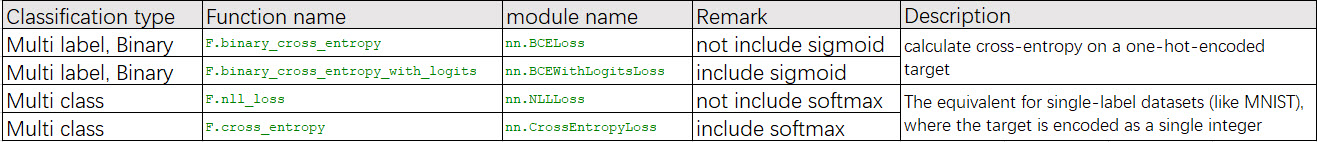

In [13]:
im